In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [127]:
line_name="Line 6A"
valves =  pd.read_excel(f"{file_loc}/{'Valves'}.xls")

In [260]:
line_ID="Line 6A"
line_name="Line 6A"
file_loc = f"//edmusers/shamael1/Desktop/Working Files/IVP Python/{line_ID}"
#df=pd.read_csv(f"//edmusers/shamael1/Desktop/Working Files/Strapping Tables from SCADA/{file_name}/{file_name}.csv")
#IVP = pd.read_excel(file,sheet_name = None)
Facilities = pd.read_excel(f"{file_loc}/{'Facilities'}.xls")
Baseline = pd.read_excel(f"{file_loc}/{'Volume Profile'}.xlsx")
Baseline.fillna(0, inplace=True)
Baseline["Relative Location (ft)"]= Baseline["ROW MP"]*5280
                         
HCAs=pd.read_excel(f"{file_loc}/{'HCAs'}.xlsx")
CNW=HCAs[HCAs.Type_CL=="CNW"]
ESA=HCAs[HCAs.Type_CL=="ESA"]
DW=HCAs[HCAs.Type_CL=="DW"]
OPA=HCAs[HCAs.Type_CL=="OPA"]
HPA=HCAs[HCAs.Type_CL=="HPA"]

                   
water_Xing_all = pd.read_excel(f"{file_loc}/{'Water Crossings'}.xlsx")
water_Xing=water_Xing_all[water_Xing_all.Line==line_ID]  
water_Xing["Relative Location (ft)"]= water_Xing["MidMP"]*5280
water_Xing["Width (ft)"] = water_Xing["Water_Crossing_Width_ft__min"].astype(float)
maj_water_Xing = water_Xing[water_Xing.loc[:,"Width (ft)"]>= 100].sort_values(by="Relative Location (ft)").reset_index(drop=True)
#maj_water_Xing = water_Xing.loc[:,water_Xing.loc[:,"Width (ft)"]>= 100].sort_values(by="Relative Location (ft)").reset_index(drop=True)
min_water_Xing = water_Xing[water_Xing["Width (ft)"]< 100].sort_values(by="Relative Location (ft)").reset_index(drop=True)
                           
valves =  pd.read_excel(f"{file_loc}/{'Valves'}.xls")
RC_valves = valves[valves["Isolation"]=="Yes"]
HO_valves = valves[valves["Isolation"]=="No"]

C:\Users\shamael1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\shamael1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [245]:
maj_water_Xing.head()

,Line_ID,PLIntegrityLineSegmentNumber,Pipeline_Name,Line,GROUPID,Reach,SourceCrossing,Water_Body_Proximity,Water_Body_Type,StreamImpactOrder,Water_Crossing_Width_ft__min,Note,Status,StartMP,EndMP,MidMP,X,Y,Relative Location (ft),Width (ft)
2545,601,L0006A,Line 6A,Line 6A,Line 6A_3973,0,Namekagon River,Direct,River,"0_Namekagon River,1_Trego Lake",127.0,NaN,Current,53.32221996559468,54.44351399114839,53.88286697837154,-91.60788682787852,45.99284549766231,"284,501.5376458017",127.0
2527,601,L0006A,Line 6A,Line 6A,Line 6A_3989,0,Chippewa River,Direct,River,"0_Chippewa River,1_Holcombe Flowage",238.0,NaN,Current,87.98070910864706,89.37523717493605,88.67797314179155,-91.21949870439296,45.57832600946076,"468,219.6981886594",238.0
2522,601,L0006A,Line 6A,Line 6A,Line 6A_3994,0,Flambeau River,Direct,River,"0_Flambeau River,1_Chippewa River,2_Holcombe F...",238.0,NaN,Current,99.81872726209082,100.43205540724051,100.12539133466566,-91.12059167225826,45.42920154437516,"528,662.0662470347",238.0
2518,601,L0006A,Line 6A,Line 6A,Line 6A_3998,0,Jump River,Direct,River,"0_Jump River,1_Holcombe Flowage",178.0,NaN,Current,111.55335999054297,112.14272936962945,111.84804468008622,-90.96645252340758,45.30093874185486,"590,557.6759108552",178.0
2510,601,L0006A,Line 6A,Line 6A,Line 6A_4006,0,Black River,Direct,River,"0_Black River,1_Lake Arbutus",119.0,NaN,Current,136.9474319450942,137.5623637775579,137.25489786132604,-90.64723836370494,45.01456005580856,"724,705.8607078015",119.0


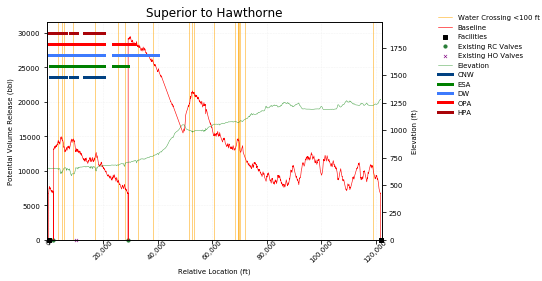

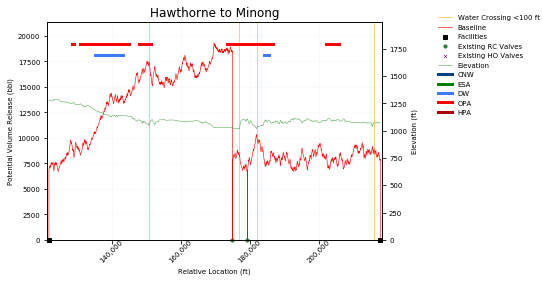

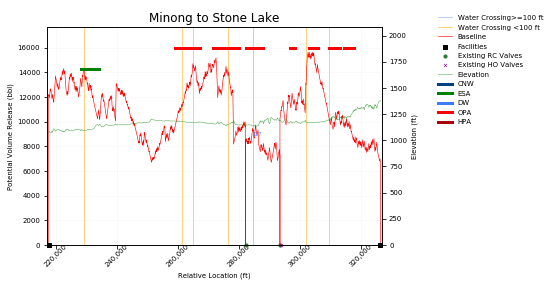

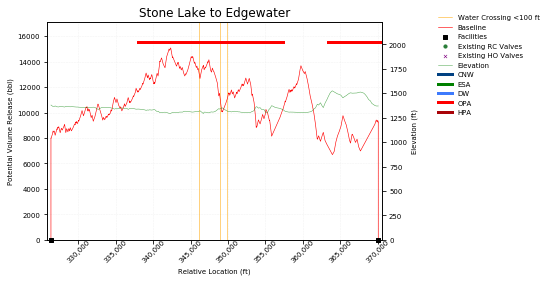

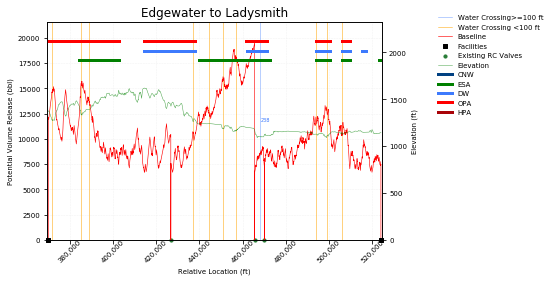

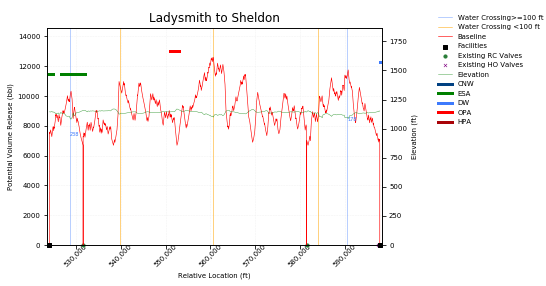

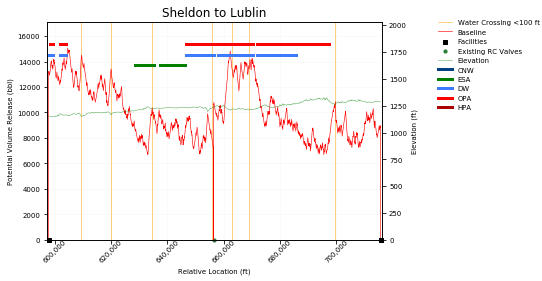

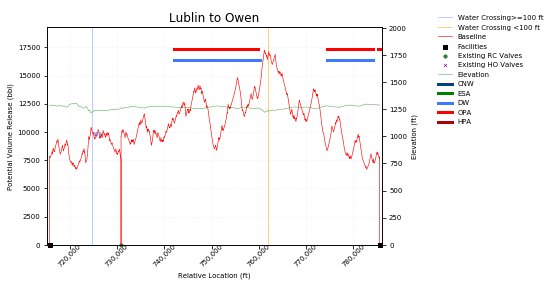

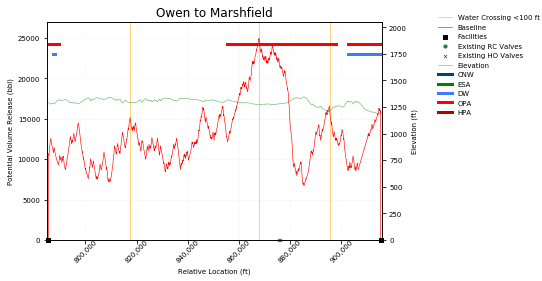

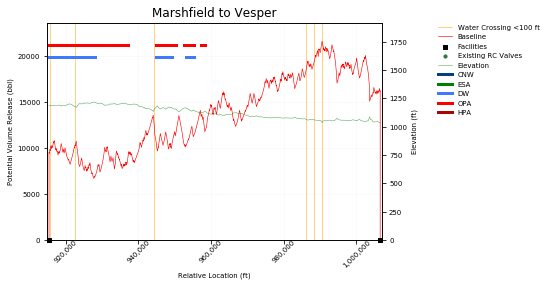

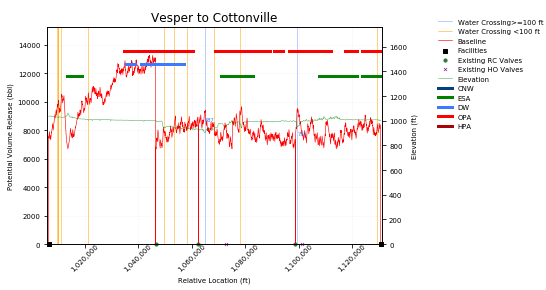

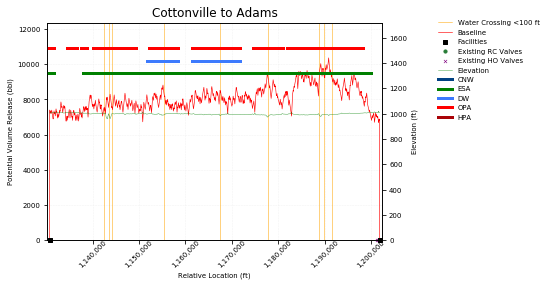

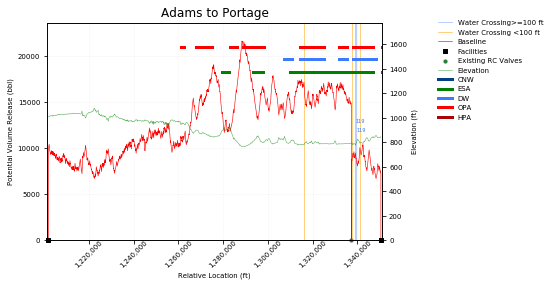

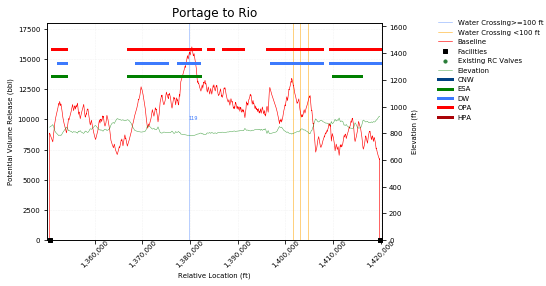

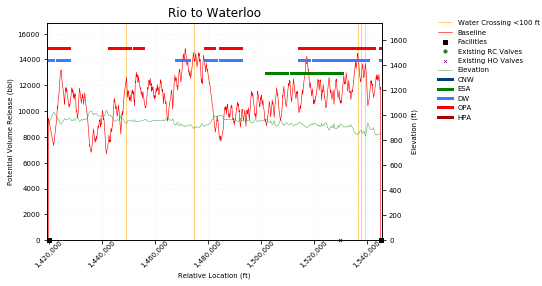

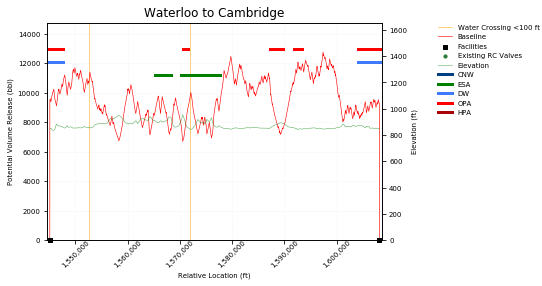

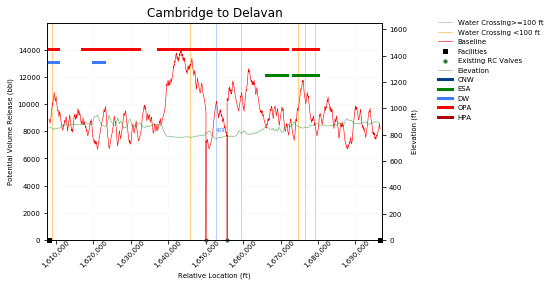

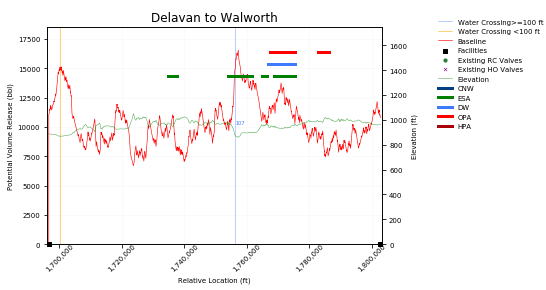

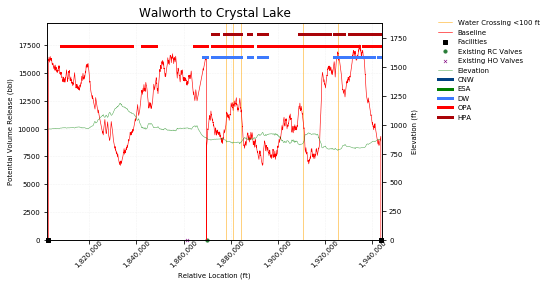

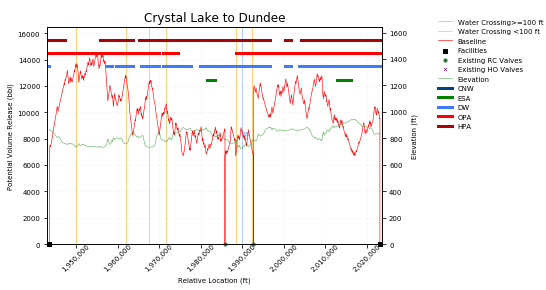

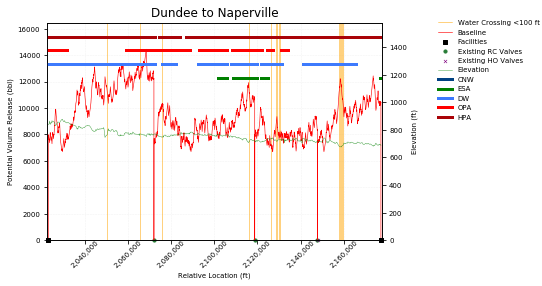

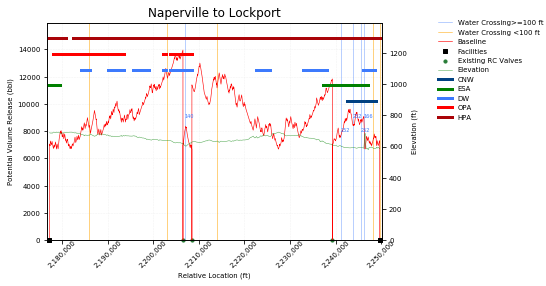

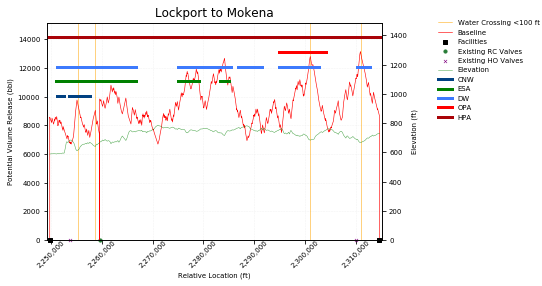

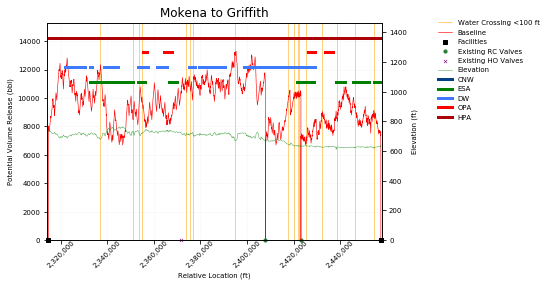

In [233]:
def draw_graph(Baseline,line_ID, pic_num, RC_valves,HO_valves, facility_name1,facility_name2,x_limit1,x_limit2, maj_water_Xing,min_water_Xing,CNW,ESA,DW,OPA,HPA):
  fig, ax = plt.subplots()
  
  y_top = Baseline["Maximum Total LVR (bbl)"].max()+2000

  for index, row in maj_water_Xing.iterrows():
    vertical_alignment= 0.5*y_top if (index % 2 == 0) else 0.5*y_top+1000
    ax.axvline(x=row["Relative Location (ft)"],color = "xkcd:lightish blue", linewidth = .6, alpha=.6 , label = "Water Crossing>=100 ft")
    ax.annotate(int(round(row['Width (ft)'])), xy=(row["Relative Location (ft)"], vertical_alignment),size = 5, color = "xkcd:lightish blue")

  for j in min_water_Xing['Relative Location (ft)']:
    ax.axvline(x=j,color = "orange", linewidth = .5 , label = "Water Crossing <100 ft")
   
  ax.plot(Baseline["Relative Location (ft)"],Baseline["Maximum Total LVR (bbl)"],color = "red", label = "Baseline", linewidth = 0.6, alpha = 1,zorder = 2)
  ax.set_xlabel("Relative Location (ft)", fontsize="x-small")

  ax.set_ylabel("Potential Volume Release (bbl)",fontsize="x-small")
  
  

  ax.tick_params(axis='x', which='major', pad=-5,labelrotation=45, labelsize = 7)
  ax.tick_params(axis="y", labelsize = 7)
  ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
  plt.ylim(bottom = 0,top=y_top)
           
  plt.xlim(left = x_limit1-500,right=x_limit2+500)
  
  plt.scatter(x=x_limit1, y = 0, marker ="s", color = "black", label = "Facilities", zorder = 3, clip_on=False, s= 10)
  plt.scatter(x=x_limit2, y = 0, marker ="s", color = "black", label = "Facilities", zorder = 3, clip_on=False, s = 10)
  ax.grid(axis="both",which="major", ls="--", c="#eeeeee", linewidth=0.5, alpha = 0.8,zorder = -1)

  for index, row in RC_valves.iterrows():
    ax.scatter(x=row["Actual Location"], y = 0 , marker ="o", color = "xkcd:darkish green", label = "Existing RC Valves",zorder = 2,clip_on=False, s= 10)
   
  for index, row in HO_valves.iterrows():
    ax.scatter(x=row["Actual Location"], y = 0 , marker ="x", color = "purple", label = "Existing HO Valves",zorder = 2,clip_on=False, s= 10, lw = 0.6)

  handles, labels = plt.gca().get_legend_handles_labels()
  by_label = dict(zip(labels, handles))
  #plt.legend(by_label.values(), by_label.keys())
  
  ax2 = ax.twinx()
  ax2.plot(Baseline["Relative Location (ft)"],Baseline["Elevation (ft)"],color = "green", label = "Elevation" , linewidth = .5, alpha=.7)
  ax2.set_ylabel("Elevation (ft)",fontsize="x-small")
  plt.ylim(bottom=0, top =Baseline["Elevation (ft)"].max()+700)
  ax2.tick_params(axis="y", labelsize = 7)
  #ax3 = CNW.plot.scatter(x=CNW["StartMP"]*5280, y=0, color='DarkBlue', label='Group 1')
  #CNW.plot.scatter(x=CNW["StartMP"]*5280, y=1000,c="DarkBlue")
  #plt.tight_layout()

  #fig.legend(loc='center left', ncol=1,bbox_to_anchor =(.8, 0.5,0.5,0.5))
  graph_title = facility_name1+" to " + facility_name2
  plt.title(graph_title)
  
  CNW_height = Baseline["Elevation (ft)"].max()+200
  ESA_height = Baseline["Elevation (ft)"].max()+300
  DW_height = Baseline["Elevation (ft)"].max()+400
  OPA_height = Baseline["Elevation (ft)"].max()+500
  HPA_height = Baseline["Elevation (ft)"].max()+600

  for index, row in CNW.iterrows():
    ax2.plot([row["Actual Start"], row["Actual End"]], [CNW_height,CNW_height],color = "xkcd:darkish blue", linewidth = 3, label = "CNW")
  for index, row in ESA.iterrows():
    ax2.plot([row["Actual Start"], row["Actual End"]], [ESA_height,ESA_height],color = "green", linewidth = 3, label = "ESA")
  for index, row in DW.iterrows():
    ax2.plot([row["Actual Start"], row["Actual End"]], [DW_height,DW_height],color = "xkcd:lightish blue", linewidth = 3, label = "DW")
  for index, row in OPA.iterrows():
    ax2.plot([row["Actual Start"], row["Actual End"]], [OPA_height,OPA_height],color = "red", linewidth = 3, label = "OPA")
  for index, row in HPA.iterrows():
    ax2.plot([row["Actual Start"], row["Actual End"]], [HPA_height,HPA_height],color = "xkcd:darkish red", linewidth = 3, label = "HPA")

  handles2, labels2 = plt.gca().get_legend_handles_labels()
  handles = handles + handles2
  labels = labels + labels2
  by_label = dict(zip(labels, handles))
  fig.legend(by_label.values(), by_label.keys(), loc='center left', ncol=1,bbox_to_anchor =(1, 0.5,0.5,0.5),fontsize="x-small",frameon=False)
    
  
  fig.savefig(f"//edmusers/shamael1/Desktop/Working Files/IVP Python/{line_ID}/Graphs/{pic_num} - {line_ID} - {graph_title}.jpeg",format='jpeg', dpi=500, bbox_inches='tight')
  
  plt.show()


for i in range(len(Facilities)-1):
  x_limit1,x_limit2 = Facilities.loc[i,"Relative Location"], Facilities.loc[i+1,"Relative Location"]
  facility_name1,facility_name2 = Facilities.loc[i,"Facility Name"].split('-')[1].lstrip(), Facilities.loc[i+1,"Facility Name"].split('-')[1].lstrip()
  Baseline_filtered = Baseline[(Baseline["Relative Location (ft)"]>=x_limit1) & (Baseline["Relative Location (ft)"]<=x_limit2)]
  maj_water_Xing_filtered=maj_water_Xing[(maj_water_Xing["Relative Location (ft)"]>=x_limit1) & (maj_water_Xing["Relative Location (ft)"]<=x_limit2)]
  min_water_Xing_filtered=min_water_Xing[(min_water_Xing["Relative Location (ft)"]>=x_limit1) & (min_water_Xing["Relative Location (ft)"]<=x_limit2)]
  RC_valves_filtered = RC_valves[(RC_valves["Actual Location"]>=x_limit1) & (RC_valves["Actual Location"]<=x_limit2)]
  HO_valves_filtered = HO_valves[(HO_valves["Actual Location"]>=x_limit1) & (HO_valves["Actual Location"]<=x_limit2)]
  draw_graph(Baseline_filtered,line_ID,i+1, RC_valves_filtered,HO_valves_filtered,facility_name1,facility_name2,x_limit1,x_limit2,maj_water_Xing_filtered, min_water_Xing_filtered,CNW,ESA,DW,OPA,HPA)
  


In [282]:
AVP_Results =  pd.read_excel(f"{file_loc}/{'AVP Results'}.xlsx")
valves["Actual Location"]= valves["Actual Location"].round(0)
AVP_Results= AVP_Results.merge(valves[["Actual Location","Isolation"]],left_on="Valve Relative Location (ft)", right_on="Actual Location",how="left")
col=AVP_Results.columns
AVP_Results=AVP_Results[AVP_Results.Isolation=="Yes"]
AVP_Results["Line"]=line_name
AVP_Results["Valve Location (MP)"]=round(AVP_Results["Valve Relative Location (ft)"]/5280, 2)
AVP_Results["Average Volume Reduction (bbl)"]=AVP_Results["Average LVR Change (bbl)"].apply('{:,}'.format)
AVP_Results["Max Volume Reduction (bbl)"]=AVP_Results["Max LVR Reduction (bbl)"].apply('{:,}'.format)
AVP_Results["Effectiveness"]=AVP_Results["Total Effectiveness"]
AVP_Results["Valve Footprint Start (MP)"]=round(AVP_Results["Valve Footprint Start (ft)"]/5280, 2)
AVP_Results["Valve Footprint End (MP)"]=round(AVP_Results["Valve Footprint End (ft)"]/5280, 2)
AVP_Results["Footprint Length (mi)"]= round(AVP_Results["Valve Footprint End (MP)"]-AVP_Results["Valve Footprint Start (MP)"], 2)


Valve_Rank= AVP_Results.drop(columns=col)
                             
Valve_Rank=Valve_Rank.sort_values(by="Valve Location (MP)").reset_index(drop=True)
Valve_Rank["Overlap?"]="No"
Valve_Rank["% covered by another valve footprint"]=0                       


for i in range(0, len(Valve_Rank)):
   if i == 0:
        if Valve_Rank.loc[i, "Valve Footprint Start (MP)"]== Valve_Rank.loc[i+1, "Valve Footprint Start (MP)"] or (Valve_Rank.loc[i, "Valve Footprint End (MP)"]== Valve_Rank.loc[i+1, "Valve Footprint End (MP)"]):
            Valve_Rank.loc[i, "Overlap?"]="Yes" 
          
        if Valve_Rank.loc[i, "Valve Footprint Start (MP)"]==Valve_Rank.loc[i+1, "Valve Footprint Start (MP)"] and Valve_Rank.loc[i, "Valve Footprint End (MP)"]<=Valve_Rank.loc[i+1, "Valve Footprint End (MP)"]:
            Valve_Rank.loc[i,"% covered by another valve footprint"]=1
        if Valve_Rank.loc[i, "Valve Footprint Start (MP)"]<Valve_Rank.loc[i+1, "Valve Footprint Start (MP)"] and Valve_Rank.loc[i, "Valve Footprint End (MP)"]==Valve_Rank.loc[i+1, "Valve Footprint End (MP)"]:
            Valve_Rank.loc[i,"% covered by another valve footprint"]=round(Valve_Rank.loc[i+1,"Footprint Length (mi)"]/Valve_Rank.loc[i,"Footprint Length (mi)"], 2)           
                             
   elif i<len(Valve_Rank)-1:
        if (Valve_Rank.loc[i, "Valve Footprint Start (MP)"]== Valve_Rank.loc[i-1, "Valve Footprint Start (MP)"]) or (Valve_Rank.loc[i, "Valve Footprint Start (MP)"]== Valve_Rank.loc[i+1, "Valve Footprint Start (MP)"]) or (Valve_Rank.loc[i, "Valve Footprint End (MP)"]== Valve_Rank.loc[i-1, "Valve Footprint End (MP)"]) or (Valve_Rank.loc[i, "Valve Footprint End (MP)"]== Valve_Rank.loc[i+1, "Valve Footprint End (MP)"]):
            Valve_Rank.loc[i, "Overlap?"]="Yes" 
        if Valve_Rank.loc[i, "Valve Footprint Start (MP)"]==Valve_Rank.loc[i+1, "Valve Footprint Start (MP)"] and Valve_Rank.loc[i, "Valve Footprint End (MP)"]<=Valve_Rank.loc[i+1, "Valve Footprint End (MP)"]:
            Valve_Rank.loc[i,"% covered by another valve footprint"]=1
        if Valve_Rank.loc[i, "Valve Footprint Start (MP)"]<Valve_Rank.loc[i+1, "Valve Footprint Start (MP)"] and Valve_Rank.loc[i, "Valve Footprint End (MP)"]==Valve_Rank.loc[i+1, "Valve Footprint End (MP)"]:
            Valve_Rank.loc[i,"% covered by another valve footprint"]=round(Valve_Rank.loc[i+1,"Footprint Length (mi)"]/Valve_Rank.loc[i,"Footprint Length (mi)"], 2)             
        if Valve_Rank.loc[i, "Valve Footprint Start (MP)"]==Valve_Rank.loc[i-1, "Valve Footprint Start (MP)"] and Valve_Rank.loc[i, "Valve Footprint End (MP)"]>Valve_Rank.loc[i-1, "Valve Footprint End (MP)"]:
            Valve_Rank.loc[i,"% covered by another valve footprint"]=round(Valve_Rank.loc[i-1,"Footprint Length (mi)"]/Valve_Rank.loc[i,"Footprint Length (mi)"], 2)             
        if Valve_Rank.loc[i, "Valve Footprint Start (MP)"]>=Valve_Rank.loc[i-1, "Valve Footprint Start (MP)"] and Valve_Rank.loc[i, "Valve Footprint End (MP)"]==Valve_Rank.loc[i+1, "Valve Footprint End (MP)"]:
            Valve_Rank.loc[i,"% covered by another valve footprint"]=1                        
        
   elif i==len(Valve_Rank)-1:
        if Valve_Rank.loc[i, "Valve Footprint Start (MP)"]== Valve_Rank.loc[i-1, "Valve Footprint Start (MP)"] or (Valve_Rank.loc[i, "Valve Footprint End (MP)"]== Valve_Rank.loc[i-1, "Valve Footprint End (MP)"]):
            Valve_Rank.loc[i, "Overlap?"]="Yes"
        if Valve_Rank.loc[i, "Valve Footprint Start (MP)"]==Valve_Rank.loc[i-1, "Valve Footprint Start (MP)"] and Valve_Rank.loc[i, "Valve Footprint End (MP)"]>Valve_Rank.loc[i-1, "Valve Footprint End (MP)"]:
            Valve_Rank.loc[i,"% covered by another valve footprint"]=round(Valve_Rank.loc[i-1,"Footprint Length (mi)"]/Valve_Rank.loc[i,"Footprint Length (mi)"],2)             
        if Valve_Rank.loc[i, "Valve Footprint Start (MP)"]>=Valve_Rank.loc[i-1, "Valve Footprint Start (MP)"] and Valve_Rank.loc[i, "Valve Footprint End (MP)"]==Valve_Rank.loc[i-1, "Valve Footprint End (MP)"]:
            Valve_Rank.loc[i,"% covered by another valve footprint"]=1                 
                             
                             
for i in range(0, len(Valve_Rank)):
   #  for j in range(0, len(maj_water_Xing)):
     #     if maj_water_Xing[j,"MidMP"]> Valve_Rank.loc[i,"Valve Footprint Start (MP)"] and maj_water_Xing[j,"MidMP"]< Valve_Rank.loc[i,"Valve Footprint End (MP)"]:
         #     Valve_Rank["Rank"]=6
        
   if Valve_Rank.loc[i,"% covered by another valve footprint"]==0 and Valve_Rank.loc[i,"Effectiveness"]>=400:
        Valve_Rank.loc[i,"Rank"]=6
   if Valve_Rank.loc[i,"% covered by another valve footprint"]<1 and Valve_Rank.loc[i,"% covered by another valve footprint"]>0 and Valve_Rank.loc[i,"Effectiveness"]>=400:
        Valve_Rank.loc[i,"Rank"]=5
   elif Valve_Rank.loc[i,"% covered by another valve footprint"]==1 and Valve_Rank.loc[i,"Effectiveness"]>=400:
              Valve_Rank.loc[i,"Rank"]=4
   elif Valve_Rank.loc[i,"% covered by another valve footprint"]==0 and Valve_Rank.loc[i,"Effectiveness"]<400:
              Valve_Rank.loc[i,"Rank"]=3
   elif Valve_Rank.loc[i,"% covered by another valve footprint"]<1 and Valve_Rank.loc[i,"% covered by another valve footprint"]>0 and Valve_Rank.loc[i,"Effectiveness"]<400:
              Valve_Rank.loc[i,"Rank"]=2
   else:
              Valve_Rank.loc[i,"Rank"]=1                

In [269]:
maj_water_Xing.describe

<bound method NDFrame.describe of     Line_ID PLIntegrityLineSegmentNumber Pipeline_Name     Line       GROUPID  \
0       601                       L0006A       Line 6A  Line 6A  Line 6A_3973   
1       601                       L0006A       Line 6A  Line 6A  Line 6A_3989   
2       601                       L0006A       Line 6A  Line 6A  Line 6A_3994   
3       601                       L0006A       Line 6A  Line 6A  Line 6A_3998   
4       601                       L0006A       Line 6A  Line 6A  Line 6A_4006   
5       601                       L0006A       Line 6A  Line 6A  Line 6A_4023   
6       601                       L0006A       Line 6A  Line 6A  Line 6A_4026   
7       601                       L0006A       Line 6A  Line 6A  Line 6A_4037   
8       601                       L0006A       Line 6A  Line 6A  Line 6A_4037   
9       601                       L0006A       Line 6A  Line 6A  Line 6A_4039   
10      601                       L0006A       Line 6A  Line 6A  Line 6A_40

In [283]:
Valve_Rank

,Line,Valve Location (MP),Average Volume Reduction (bbl),Max Volume Reduction (bbl),Effectiveness,Valve Footprint Start (MP),Valve Footprint End (MP),Footprint Length (mi),Overlap?,% covered by another valve footprint,Rank
0,Line 6A,0.33,"9,791","28,746",325,0.0,1.08,1.08,Yes,1.0,1.0
1,Line 6A,5.53,"21,982","22,466",3555,0.0,5.56,5.56,Yes,0.19,5.0
2,Line 6A,33.13,"5,089","11,758",277,27.77,41.24,13.47,Yes,1.0,1.0
3,Line 6A,33.95,"4,229","8,123",192,27.77,41.24,13.47,Yes,0.0,3.0
4,Line 6A,53.45,"3,447","4,740",167,41.24,54.75,13.51,Yes,1.0,1.0
5,Line 6A,55.58,"2,448","3,557",145,41.24,58.81,17.57,Yes,0.77,2.0
6,Line 6A,80.83,"2,863","3,762",457,80.68,99.25,18.57,Yes,1.0,4.0
7,Line 6A,88.18,"15,615","15,728",1226,88.18,99.25,11.07,Yes,1.0,4.0
8,Line 6A,89.03,"14,531","16,242",936,88.18,99.25,11.07,Yes,0.0,1.0
9,Line 6A,100.68,595,596,4,99.25,100.68,1.43,No,0.0,3.0
